<a href="https://colab.research.google.com/github/sytrinh/digit_recognition_mnist/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instead of a fully connected neural network like [here](https://github.com/sytrinh/digit_recognition_mnist/blob/main/FCNN.ipynb), we will train a convolutional neural network on MNIST dataset.

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Load data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
unique_labels = np.unique(train_labels)
print('Training set shape: {}'.format(train_images.shape))
print('Test set shape: {}'.format(test_images.shape))
print('Number of images in training set: {}'.format(train_images.shape[0]))
print('Number of images in test set: {}'.format(test_images.shape[0]))
print('Image size: {}'.format(train_images.shape[1:]))
print('Unique labels: {}'.format(unique_labels))
print('Number of unique labels: {}'.format(len(np.unique(train_labels))))



Training set shape: (60000, 28, 28)
Test set shape: (10000, 28, 28)
Number of images in training set: 60000
Number of images in test set: 10000
Image size: (28, 28)
Unique labels: [0 1 2 3 4 5 6 7 8 9]
Number of unique labels: 10


In [ ]:
# reshape the images to (28, 28, 1)
x_train = train_images.reshape((train_images.shape[0], *train_images.shape[1:], 1)).astype("float32")
x_test = test_images.reshape((test_images.shape[0], *test_images.shape[1:], 1)).astype("float32")
y_train = train_labels.copy()
y_test = test_labels.copy()
print('x_train shape: {}'.format(x_train.shape))
print('x_test shape: {}'.format(x_test.shape))

x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)


In [ ]:
# Define a data augmentation stage to add to an image model
data_augmentation = keras.Sequential([
                                      # layers.RandomRotation(0.1),
                                      layers.RandomWidth(0.2),
                                      layers.RandomHeight(0.1),
                                      layers.RandomZoom(0.2),
                                      layers.Resizing(28,28)
])

In [ ]:
# Define a CNN model

inputs = keras.Input(shape=(28,28,1))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.4)(x)
outputs = layers.Dense(10, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 sequential_3 (Sequential)   (None, 28, 28, 1)         0         
                                                                 
 rescaling_6 (Rescaling)     (None, 28, 28, 1)         0         
                                                                 
 conv2d_18 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 11, 11, 64)        18496     
                                                           

In [ ]:
callbacks_list = [
  keras.callbacks.EarlyStopping(
                monitor="val_accuracy", # Monitors the model’s validation accuracy
                patience=10), # Interrupts training when accuracy has stopped improving for two epochs
  keras.callbacks.ModelCheckpoint(
                 filepath="mist_cnn_augmentation_2.keras",
                 save_best_only=True,
                 monitor="val_loss")
  ]

opt = keras.optimizers.Adam(learning_rate=1e-4)
model.compile(optimizer=opt,
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history = model.fit(x_train, y_train, epochs=50, batch_size=64,
          callbacks=callbacks_list,
          validation_split=0.1,
          verbose=1)

Epoch 1/50
844/844 [==============================] - 5s 6ms/step - loss: 0.3831 - accuracy: 0.8847 - val_loss: 0.0769 - val_accuracy: 0.9783
Epoch 2/50
844/844 [==============================] - 4s 5ms/step - loss: 0.1168 - accuracy: 0.9648 - val_loss: 0.0574 - val_accuracy: 0.9820
Epoch 3/50
844/844 [==============================] - 4s 5ms/step - loss: 0.0846 - accuracy: 0.9737 - val_loss: 0.0460 - val_accuracy: 0.9867
Epoch 4/50
844/844 [==============================] - 5s 5ms/step - loss: 0.0696 - accuracy: 0.9785 - val_loss: 0.0397 - val_accuracy: 0.9890
Epoch 5/50
844/844 [==============================] - 4s 5ms/step - loss: 0.0595 - accuracy: 0.9817 - val_loss: 0.0388 - val_accuracy: 0.9900
Epoch 6/50
844/844 [==============================] - 5s 5ms/step - loss: 0.0537 - accuracy: 0.9834 - val_loss: 0.0536 - val_accuracy: 0.9832
Epoch 7/50
844/844 [==============================] - 4s 5ms/step - loss: 0.0490 - accuracy: 0.9847 - val_loss: 0.0366 - val_accuracy: 0.9902
Epoch 

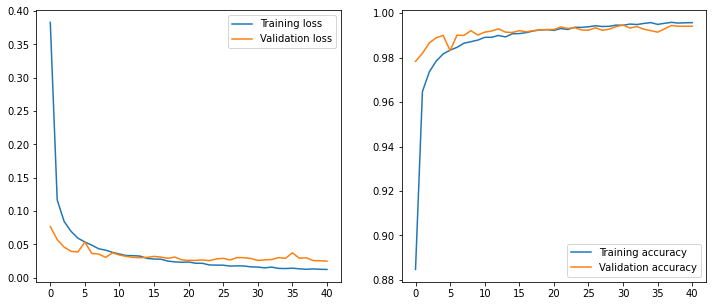

In [ ]:

fig, ax = plt.subplots(1,2,figsize=(12,5))

ax[0].plot(history.history["loss"], label="Training loss")
ax[0].plot(history.history["val_loss"], label="Validation loss")
ax[0].legend()


ax[1].plot(history.history["accuracy"], label="Training accuracy")
ax[1].plot(history.history["val_accuracy"], label="Validation accuracy")
ax[1].legend()

plt.show()


In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.3f}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0203 - accuracy: 0.9947
Test accuracy: 0.995


In [ ]:
best_model = keras.models.load_model("mist_cnn_augmentation_2.keras")

In [ ]:
def get_wrong_labels(y_pred, y_true):
    for i  in range(len(y_pred)):
        if np.argmax(y_pred[i]) != np.argmax(y_true[i]):
            yield i

y_pred = best_model.predict(x_test)

gen = get_wrong_labels(y_pred, y_test)

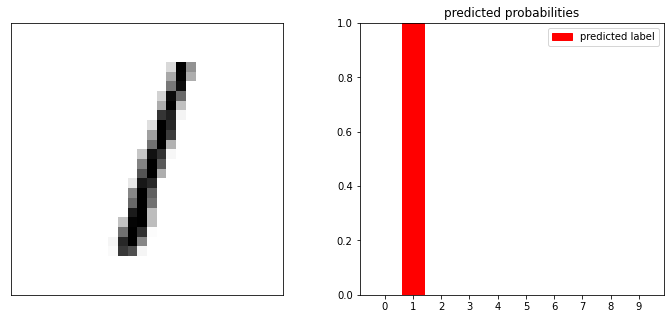

In [ ]:
index = next(gen)


fig, ax = plt.subplots(1,2,figsize=(12,5))

image = np.reshape(x_test[index],(28,28))
true_label = np.argmax(y_pred[index])
predicted_label = np.argmax(y_pred[index])
ax[0].imshow(image, cmap='binary')
ax[0].set_xticks([])
ax[0].set_yticks([])

bar = ax[1].bar(range(10), y_pred[index],color='#777777')
bar[true_label].set_color('blue')
bar[true_label].set_label('true label')
bar[predicted_label].set_color('red')
bar[predicted_label].set_label('predicted label')
ax[1].set_xticks(range(10))
ax[1].set_title("predicted probabilities")
ax[1].set_ylim([0,1])
plt.legend()
plt.show()